# Group Project EDA Playground (MPG and Concrete Data)

In [1]:
# If some libraries are missing, start the R interactive command line and run install.packages(<missing-package-name-here>)

library(tidyverse)
library(tidymodels)
library(repr)
library(httr)
library(readxl)
library(ggplot2)
library(GGally)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────── tidymodels 0.1.4 ──

✔ broom        0.7.11     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.2.0      ✔ yardstick    0.0.9 
✔ recipes      0.2.0 

In [2]:
concrete <- read.csv("data/concrete/concrete-compressive-strength.txt", header = TRUE, skip = 1)
mpg <- read.table("data/car-mpg.txt", header = TRUE)
concrete %>% head(5)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,AgeDays,CompressiveStrengthMPa
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,540.0,0.0,0,162,2.5,1040.0,676.0,28,79.99
2,540.0,0.0,0,162,2.5,1055.0,676.0,28,61.89
3,332.5,142.5,0,228,0.0,932.0,594.0,270,40.27
4,332.5,142.5,0,228,0.0,932.0,594.0,365,41.05
5,198.6,132.4,0,192,0.0,978.4,825.5,360,44.30


Cement through FineAggregate all in $\frac{kg}{m^3}$

In [3]:
mpg %>% head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino


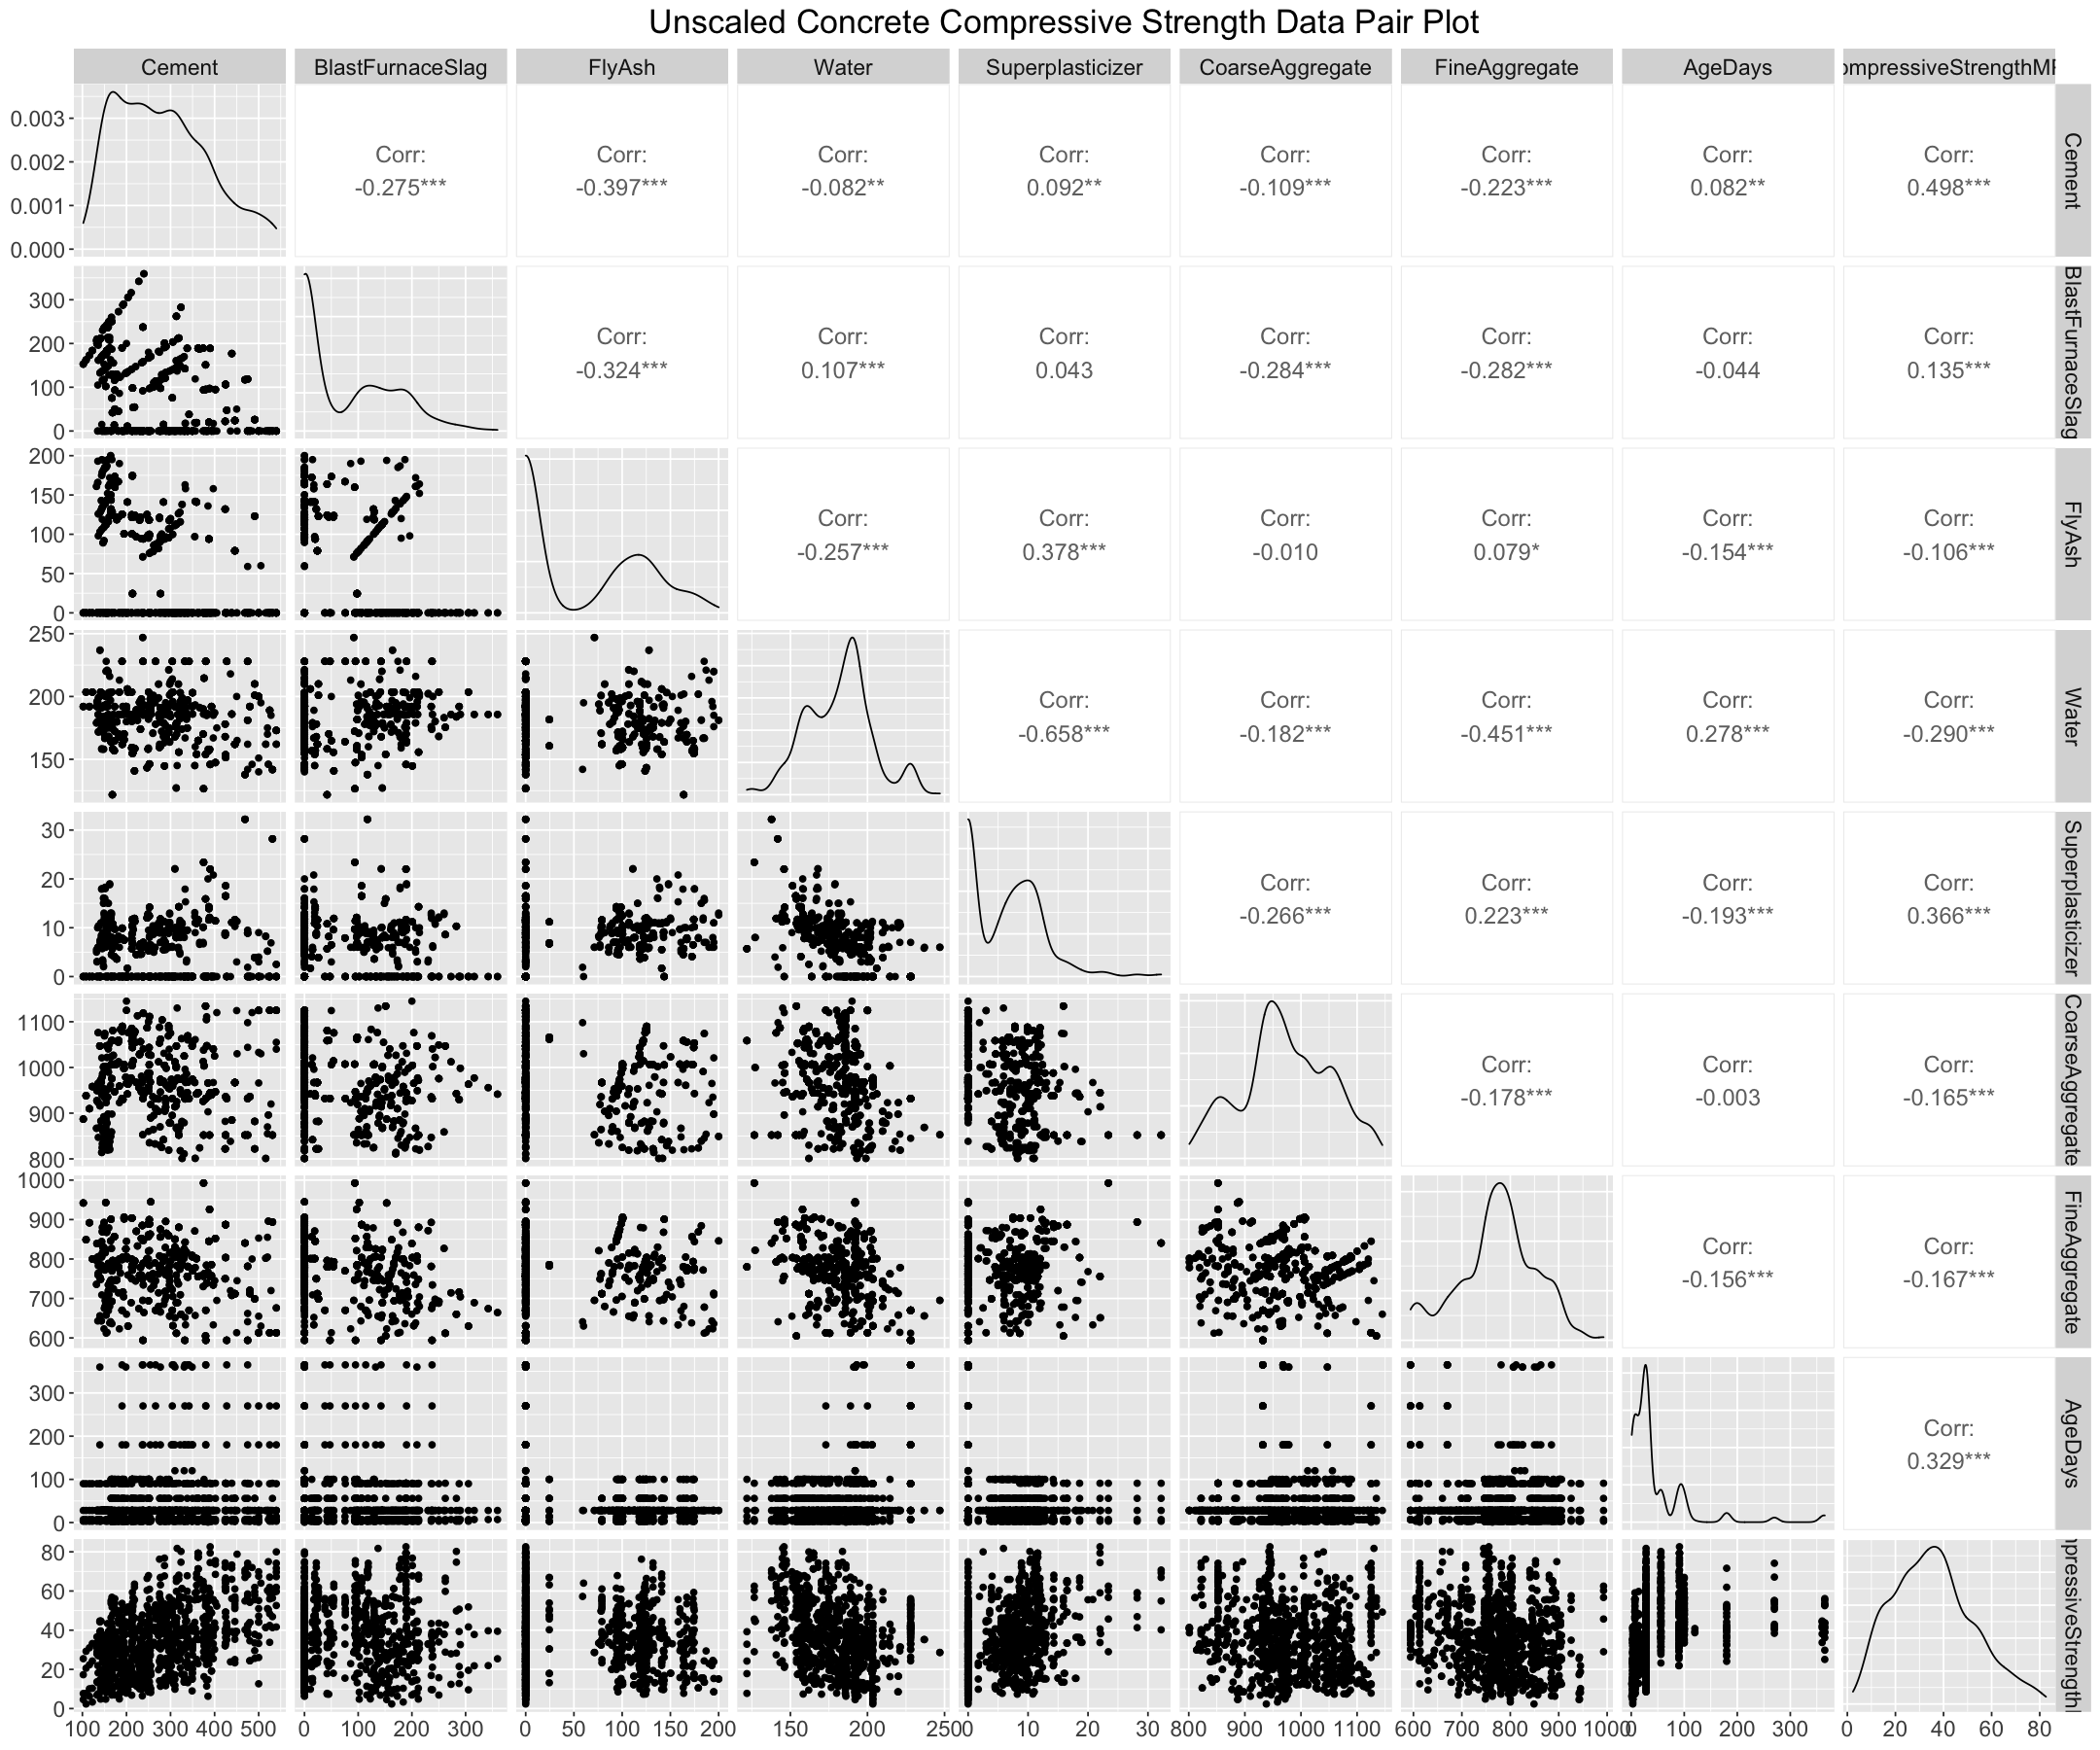

In [4]:
# set plot size options
options(repr.plot.width = 18, repr.plot.height = 15)

# pair plot for concrete data
ggpairs(concrete,
           lower=list(combo=wrap("facethist", binwidth=0.5)),
           upper=list(continuous = wrap("cor", size=5))) +
        ggtitle("Unscaled Concrete Compressive Strength Data Pair Plot") +
        theme(text = element_text(size = 17),
              plot.title = element_text(hjust = 0.5))

#### MPG data will definitely be more straightforward to work with if we are allowed to use it

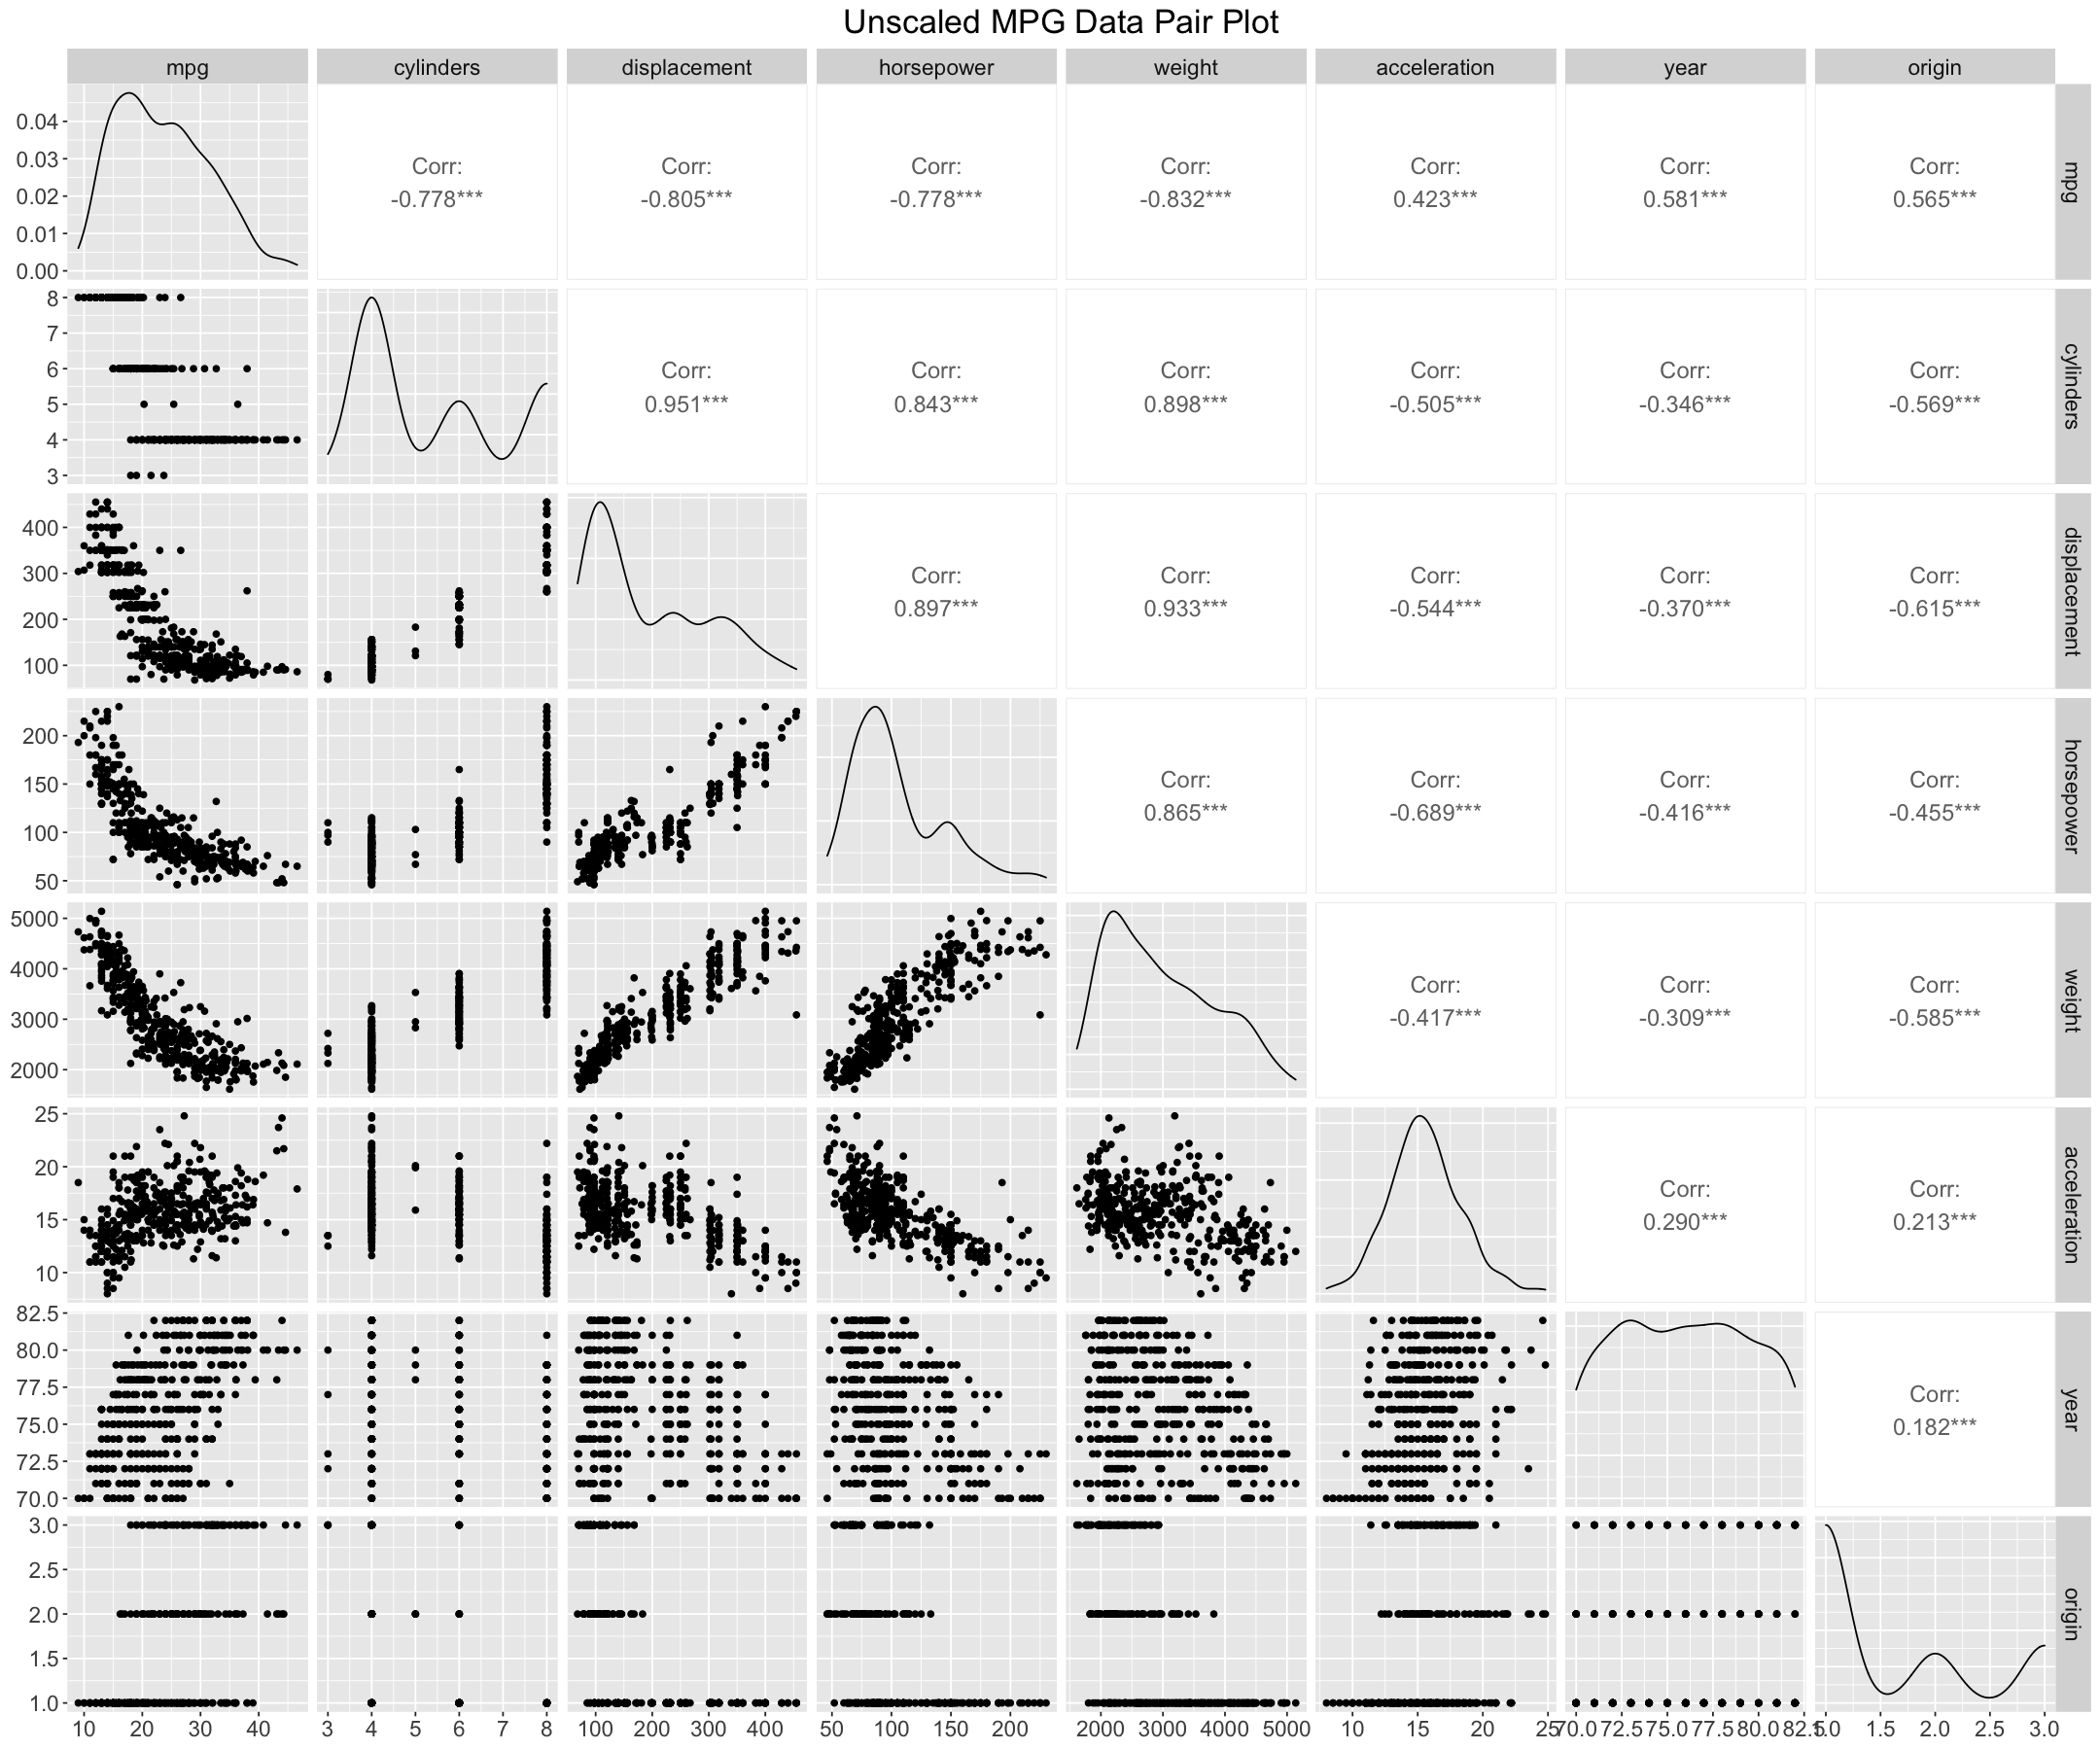

In [5]:
# pair plot for car MPG data
ggpairs(mpg %>% select(-"name"),
           lower=list(combo=wrap("facethist", binwidth=0.5)),
           upper=list(continuous = wrap("cor", size=5))) +
        ggtitle("Unscaled MPG Data Pair Plot") +
        theme(text = element_text(size = 17),
              plot.title = element_text(hjust = 0.5))